<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/diabetes.csv')

In [23]:
df.shape

(768, 9)

In [ ]:
means=df['Insulin'].mean()
medians=df['Insulin'].median()
modes=df['Insulin'].mode()


In [ ]:
print(means)
print(medians)
print(modes)

79.79947916666667
30.5
0    0
Name: Insulin, dtype: int64


<Axes: >

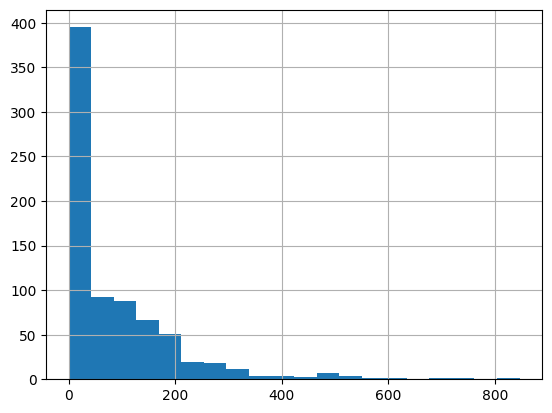

In [ ]:
df['Insulin'].hist(bins=20)

In [1]:
import statistics as s

In [2]:
orbital_period = [88, 225, 365, 687, 4331, 10756, 30687, 60190]    # days
dist_from_sun = [58, 108, 150, 228, 778, 1400, 2900,4500] # million km
# Observe that a linear relationship is imperfect
print(round(s.correlation(orbital_period, dist_from_sun), 4))

0.9882


In [5]:
import pandas as pd
df=pd.read_csv('/content/diabetes.csv')
df
print(round(s.correlation(df['Insulin'], df['Glucose']), 4))

0.3314


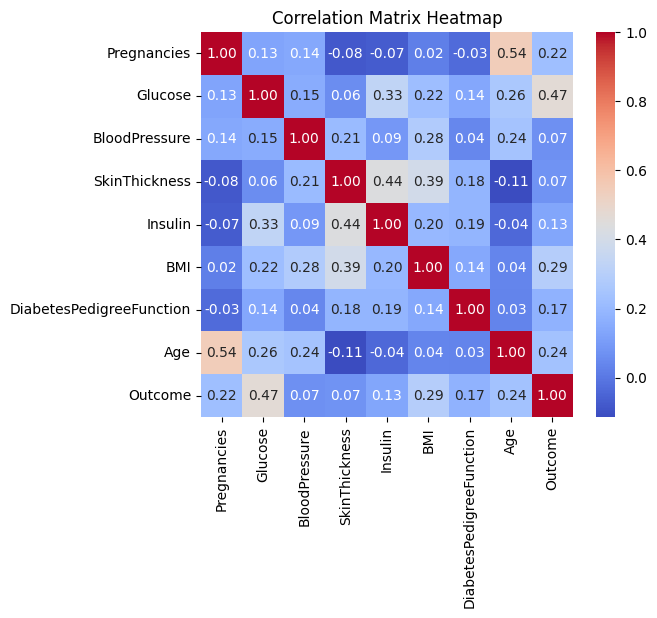

In [6]:
# prompt: draw a heatmap with corelation values of all columns

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(6, 5))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [10]:
#IQR using Numpy

import numpy as np
data = df['BloodPressure']

Q1 = np.percentile(data, 25)
# Third quartile (Q3)
Q3 = np.percentile(data, 75)
# Interquaritle range (IQR)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

62.0
80.0
18.0


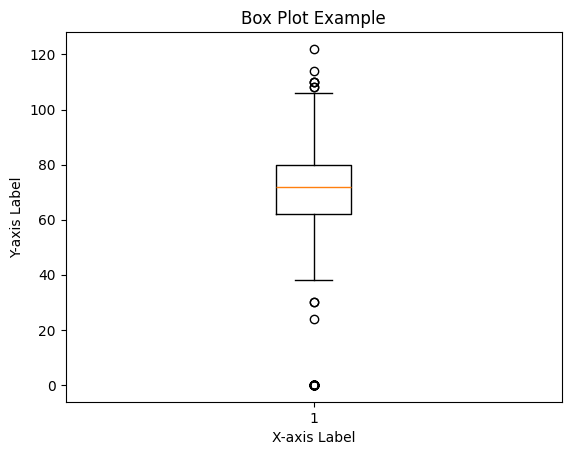

In [9]:
# Sample data (replace this with your own dataset)
# data = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

data=df['BloodPressure']
# Create a box plot
plt.boxplot(data)


# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Box Plot Example')


# Show the plot
plt.show()

<Axes: >

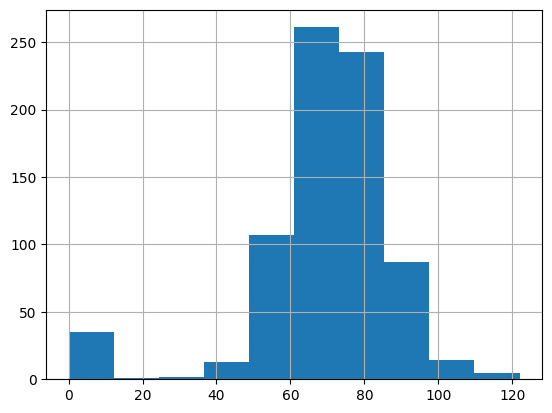

In [11]:
df['BloodPressure'].hist()

In [12]:
#Finding the Boundary Values
print("Highest allowed",df['BloodPressure'].mean() + 3*df['BloodPressure'].std())
print("Lowest allowed",df['BloodPressure'].mean() - 3*df['BloodPressure'].std())

Highest allowed 127.17289026193433
Lowest allowed 11.038047238065673


In [17]:
a=df[(df['BloodPressure']>127 ) | (df['BloodPressure']<11)]

In [19]:
print(a)
print(a['BloodPressure'].max())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167             

In [20]:
a.shape#outlayered data

(35, 9)

In [22]:
b=df[(df['BloodPressure']<127)& (df['BloodPressure']>11)]
b.shape

(733, 9)

In [32]:
#Capping/Imputation
df['BloodPressure']=np.where(
    df['BloodPressure']>127,
    127,
    np.where(
        df['BloodPressure']<11,
        11,
        df['BloodPressure']
    )
)

data['BloodPressure']=np.where(df['BloodPressure']<11,11,df['BloodPressure'])
display(df['BloodPressure'])

,BloodPressure
0,72
1,66
2,64
3,66
4,40
...,...
763,76
764,70
765,72
766,60


In [33]:
#Finding the IQR
percentile25 = df['BloodPressure'].quantile(0.25)
percentile75 = df['BloodPressure'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

18.0
62.0
80.0


In [34]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

107.0
35.0
